In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("../dataset/train.csv")  

#Initial Data Exploration
print(df.head())
print(df.info())
print(df.describe())

#Identifying Missing Values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values)
print(missing_percentage)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:

#Impute numerical columns with mean, categorical columns with mode
df.fillna({
    col: df[col].mean() if df[col].dtype != 'O' else df[col].mode()[0] 
    for col in df.columns
}, inplace=True)

#Identifying Outliers using IQR Method
outlier_columns = [col for col in df.select_dtypes(include=[np.number]).columns]

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")



Outliers in PassengerId: 0

Outliers in Survived: 0

Outliers in Pclass: 0

Outliers in Age: 66

Outliers in SibSp: 46

Outliers in Parch: 213

Outliers in Fare: 116


<Figure size 1500x1000 with 0 Axes>

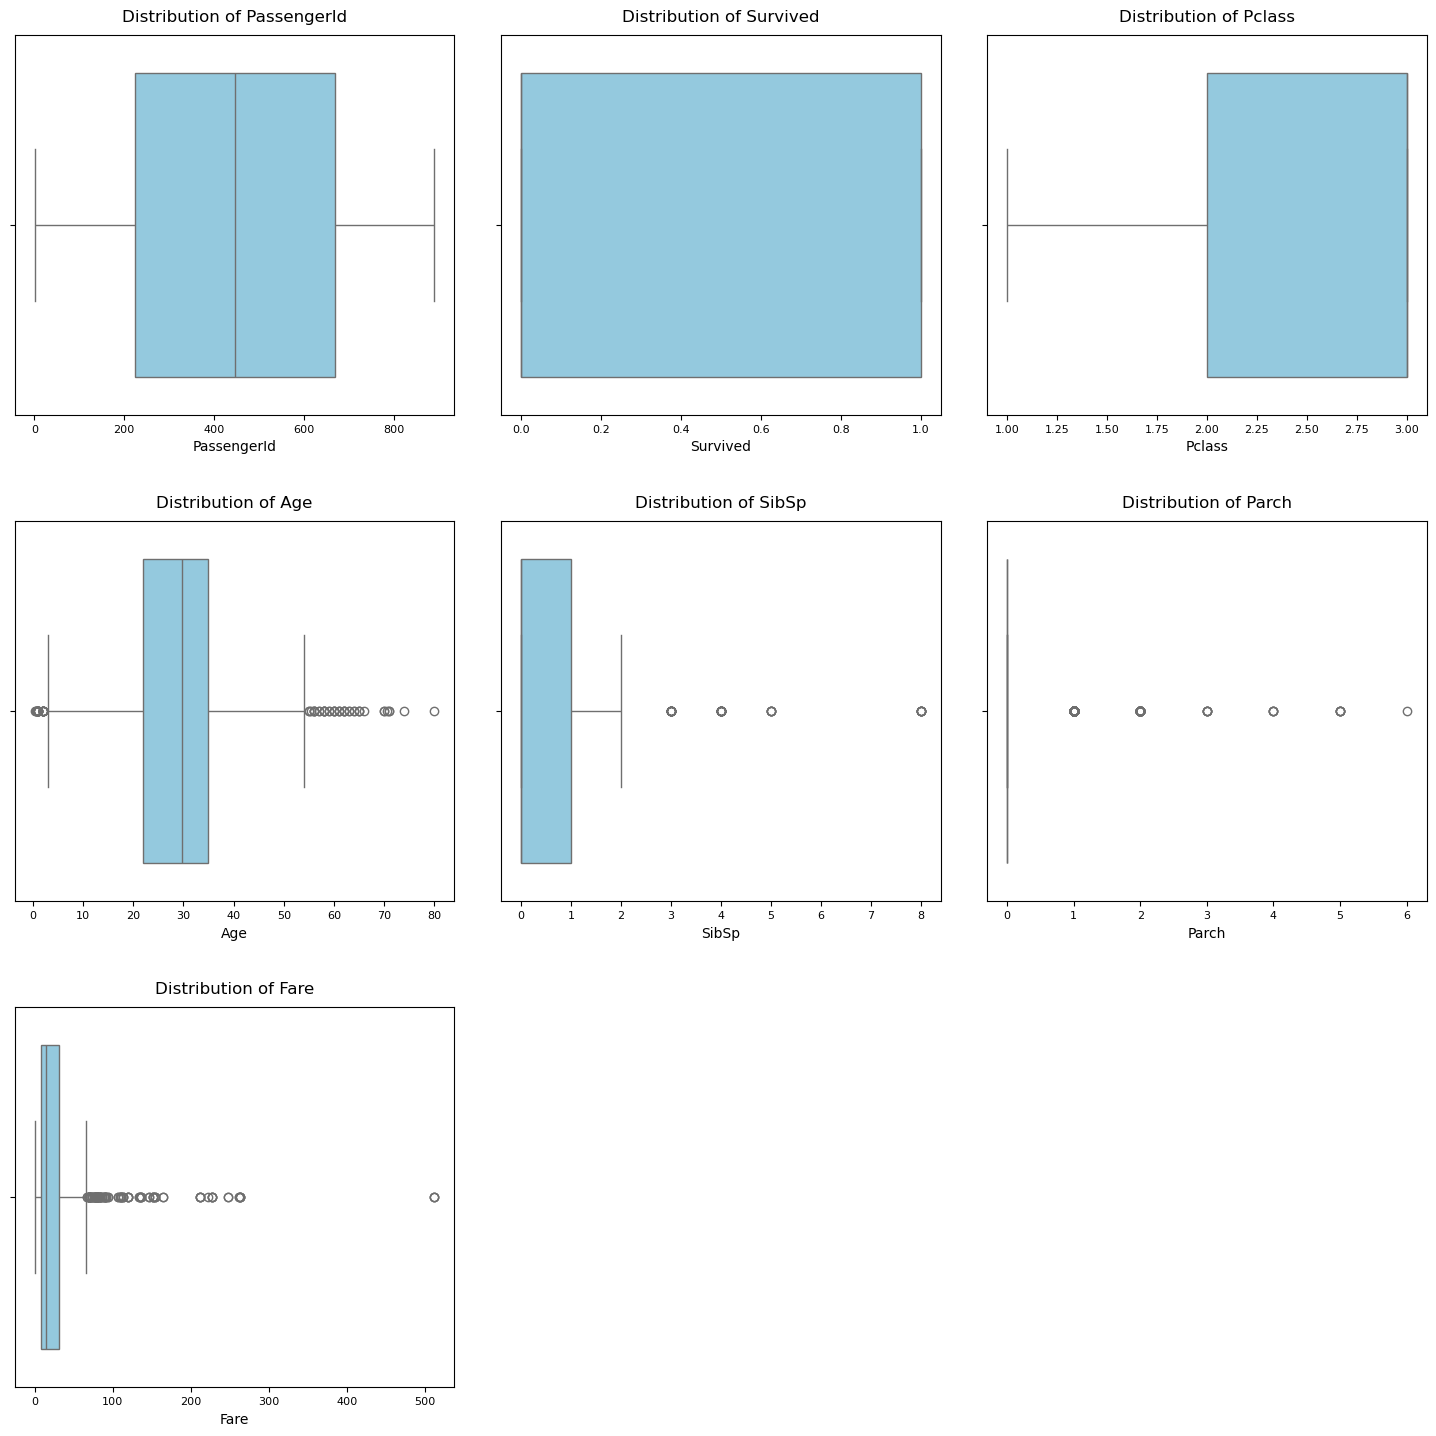

In [6]:

#Visualizing Outliers using Box Plots
plt.figure(figsize=(15, 10))

# Create a subplot grid based on number of columns
n_cols = len(outlier_columns)
n_rows = (n_cols + 2) // 3 
fig, axes = plt.subplots(n_rows, min(n_cols, 3), figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(outlier_columns):
    sns.boxplot(x=df[col], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, pad=10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].tick_params(labelsize=8)

# Remove empty subplots if any
for idx in range(len(outlier_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(pad=3.0)
plt.savefig("outlier_visualization.png")
plt.show()



In [7]:

#Handling Outliers
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Saving Cleaned Data
df.to_csv("cleaned_dataset.csv", index=False)
